In [1]:
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
import functions as f

In [5]:
merged_df = pd.read_csv("Clustering/Merged DataFrame.csv", index_col=0)

In [6]:
merged_df

,Arrests,BusShelters,Restaurants,Landmarks,Count Blue Collar,Count White Collar
BK09,35.0,6.0,206.0,1416.0,2477.0,11583.0
BK17,125.0,35.0,162.0,2.0,9871.0,16940.0
BK19,63.0,14.0,48.0,4.0,4716.0,8379.0
BK21,213.0,15.0,8.0,18.0,4657.0,5095.0
BK23,201.0,14.0,1.0,0.0,1946.0,4386.0
...,...,...,...,...,...,...
SI37,138.0,25.0,78.0,90.0,4392.0,6586.0
SI45,167.0,23.0,55.0,1.0,3290.0,6261.0
SI48,18.0,4.0,0.0,0.0,4273.0,7628.0
SI54,46.0,13.0,33.0,1.0,6628.0,13168.0


In [7]:
column_names = list(merged_df.columns)

In [8]:
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(merged_df.astype(float)))

In [9]:
scaled_df.columns = column_names

In [10]:
scaled_df

,Arrests,BusShelters,Restaurants,Landmarks,Count Blue Collar,Count White Collar
0,-0.915597,-1.087420,0.010965,2.455431,-1.062461,-0.062940
1,-0.418329,1.635946,-0.109806,-0.394035,0.570785,0.609382
2,-0.760891,-0.336147,-0.422711,-0.390005,-0.567893,-0.465054
3,0.067889,-0.242238,-0.532503,-0.361792,-0.580925,-0.877208
4,0.001587,-0.336147,-0.551716,-0.398065,-1.179753,-0.966190
...,...,...,...,...,...,...
190,-0.346501,0.696854,-0.340368,-0.216699,-0.639461,-0.690082
191,-0.186270,0.509036,-0.403498,-0.396050,-0.882879,-0.730871
192,-1.009525,-1.275238,-0.554461,-0.398065,-0.665746,-0.559307
193,-0.854819,-0.430056,-0.463883,-0.396050,-0.145555,0.135983


### DBSCAN

In [62]:
# provides reasonable results, 5 clusters
db = DBSCAN(eps=0.6, min_samples=3)

In [63]:
#db = DBSCAN(eps=1.54, min_samples=2)

In [64]:
y_db = db.fit_predict(scaled_df)

In [65]:
y_db

array([-1, -1,  0,  0,  0, -1,  0,  0, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  2,
        0,  0,  3, -1,  0,  0, -1,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  3,  0, -1,  0, -1,  0, -1,  0, -1,  3,  0,  0,  0,
       -1,  0,  4,  2,  5, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  1,
       -1,  0, -1, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0, -1,  5,
        0,  0,  0, -1, -1,  0,  1, -1, -1,  0,  0,  0, -1,  0,  5,  0,  0,
       -1,  0, -1,  0,  4,  2,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  4])

In [66]:
df = scaled_df.copy()
df['Cluster'] = y_db
df = df.groupby('Cluster').mean()
df = df.transpose().reset_index()
df

Cluster,index,-1,0,1,2,3,4,5
0,Arrests,0.566709,-0.465262,-0.554617,-0.729582,0.156292,-1.081353,-0.490156
1,BusShelters,0.567070,-0.516741,0.008187,0.634248,-0.085722,-1.525663,-0.179631
2,Restaurants,0.526615,-0.460716,-0.323899,-0.551716,-0.390689,-0.554461,0.172908
3,Landmarks,0.445684,-0.374703,-0.395379,-0.319473,-0.377914,-0.395379,-0.367838
4,Count Blue Collar,0.593886,-0.550831,1.315472,-1.590236,0.378097,-1.609601,0.596187
5,Count White Collar,0.662640,-0.556942,0.149119,-1.486151,-0.053193,-1.516649,0.142467


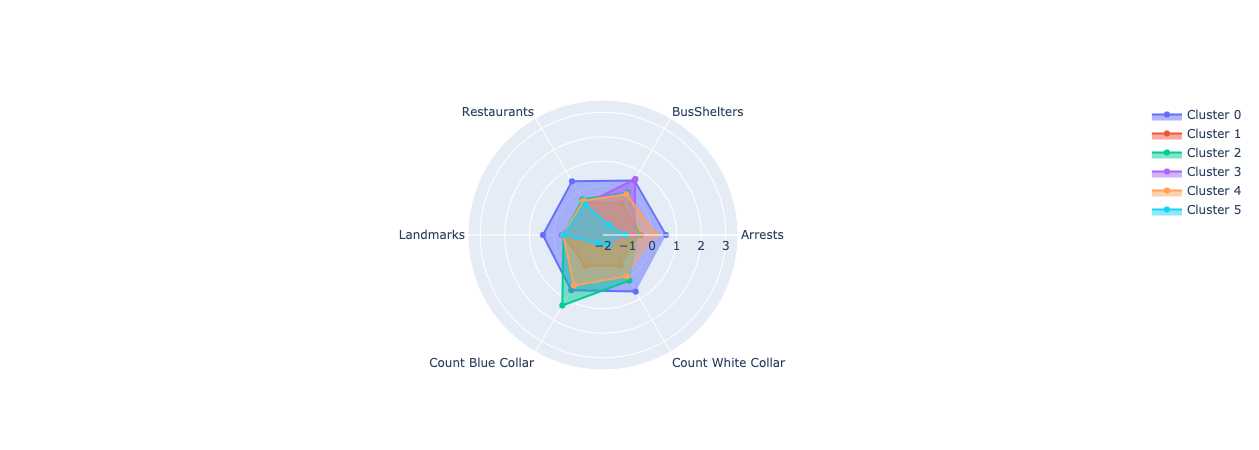

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=df[-1], theta=df['index'], fill='toself', name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=df[0], theta=df['index'], fill='toself', name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=df[1], theta=df['index'], fill='toself', name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=df[2], theta=df['index'], fill='toself', name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=df[3], theta=df['index'], fill='toself', name='Cluster 4'))
fig.add_trace(go.Scatterpolar(r=df[4], theta=df['index'], fill='toself', name='Cluster 5'))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 3.5]
    )),
  showlegend=True
)

fig.show()

In [71]:
dbscan_result = merged_df.copy()
dbscan_result['cluster'] = y_db
dbscan_result

,Arrests,BusShelters,Restaurants,Landmarks,Count Blue Collar,Count White Collar,cluster
BK09,35.0,6.0,206.0,1416.0,2477.0,11583.0,-1
BK17,125.0,35.0,162.0,2.0,9871.0,16940.0,-1
BK19,63.0,14.0,48.0,4.0,4716.0,8379.0,0
BK21,213.0,15.0,8.0,18.0,4657.0,5095.0,0
BK23,201.0,14.0,1.0,0.0,1946.0,4386.0,0
...,...,...,...,...,...,...,...
SI37,138.0,25.0,78.0,90.0,4392.0,6586.0,0
SI45,167.0,23.0,55.0,1.0,3290.0,6261.0,0
SI48,18.0,4.0,0.0,0.0,4273.0,7628.0,0
SI54,46.0,13.0,33.0,1.0,6628.0,13168.0,0


In [73]:
#dbscan_result.to_csv('Clustering/DBSCAN_Trial.csv')

#### Tune Epsilon Value

In [18]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

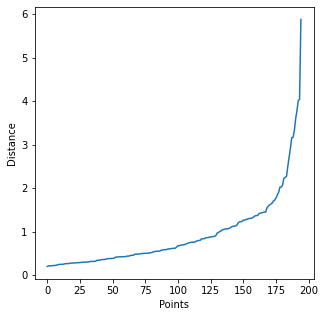

In [19]:
n = 3
nearest_neighbors = NearestNeighbors(n_neighbors=n)
neighbors = nearest_neighbors.fit(scaled_df)
distances, indices = neighbors.kneighbors(scaled_df)
distances = np.sort(distances[:,n-1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

<Figure size 360x360 with 0 Axes>

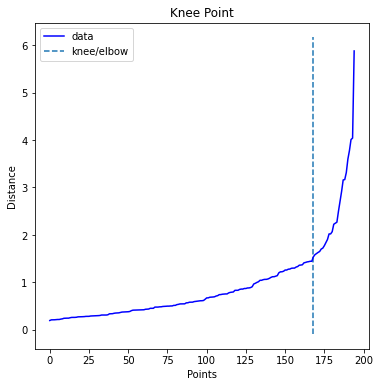

1.5388033170299869


In [20]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

print(distances[knee.knee])

### Function: Visualize Clusters on Map

In [21]:
def visualize_clusters(cluster_result_df, clusters_array):
    
    # add column of cluster values to cluster result DataFrame
    cluster_result_df['cluster'] = clusters_array
    
    # creat list to match neighborhood with each observation 
    nb_polygon = []
    for i in range(len(cluster_result_df)):
        try:
            for j in range(len(f.nb_df)):
                if cluster_result_df.index[i] == f.nb_df.ntacode[j]:
                    nb_polygon.append(f.nb_df.geometry[j])
                    break
        except:
            pass
        
    # add column of neighborhoods to cluster result DataFrame
    cluster_result_df['geometry'] = nb_polygon
    
    # convert cluster result to GeoDataFrame
    gdf = gpd.GeoDataFrame(cluster_result_df, geometry=cluster_result_df.geometry, crs="EPSG:4326")
    
    # plot on NYC map
    fig, ax = plt.subplots(figsize=(15,15))
    gdf.plot(ax=ax, column='cluster', cmap='Dark2', categorical=True, legend=True)
    plt.show()
    
    fig.clf()

In [69]:
cluster_result = merged_df.copy()

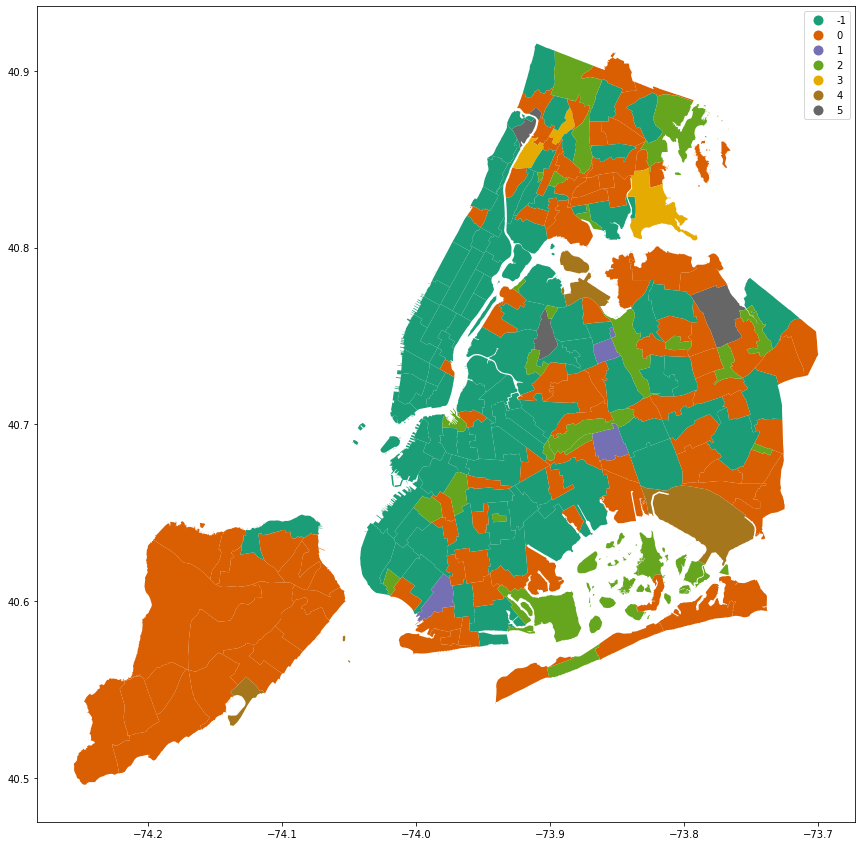

In [70]:
visualize_clusters(cluster_result, y_db)

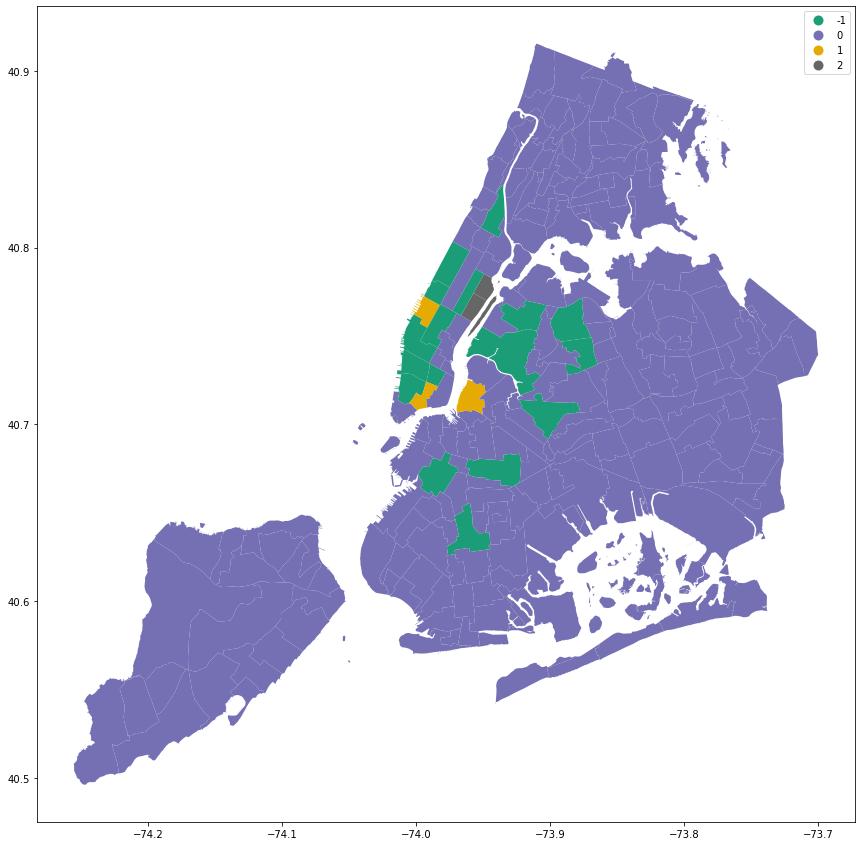

In [24]:
f.visualize_clusters(cluster_result, y_db)